# Hepatic Encephalopathy Data Summarization

**Author: Stephany Z. Flores-Ramos (sflores@health.ucsd.edu)**

In [2]:
import qiime2
import biom
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

**we are using QIIME2 Jupyter API to load the alpha and beta-diversity tables**

Load the qiime2_table.qza feature table (this is a table of spectral counts) file generated through GNPS to view the file we will use to calculate the the non-phylogenetic diversity metrics. We will similarly use the merged_feature_table_serum.qza generated from qemistree to calculate the phylogenetic metrics.

In [2]:
table = qiime2.Artifact.load('/data/Stephany/liverpath/data_files/LCMS/qiime2_output/qiime2_table.qza')
tablepd = table.view(pd.DataFrame)
tablepd.head(5)

,1,2,3,4,5,6,7,8,11,13,...,780,781,782,783,784,785,787,788,790,791
s102_BB8_01_51048.mzXML,3.865452e+06,1481959.169,1.446860e+06,9.522319e+05,1.359143e+06,773364.8940,443751.9035,885417.1945,1.149525e+06,3.559139e+05,...,0.0,0.0,0.0,3388.8465,0.0,0.0,0.0,0.000,245.700,0.0
s24_BD2_01_51087.mzXML,1.114834e+06,0.000,1.523187e+06,1.133723e+06,1.601964e+03,1613.4135,438992.7400,36590.2975,1.522557e+06,3.686883e+05,...,0.0,0.0,0.0,2944.6350,0.0,0.0,0.0,5676.988,0.000,0.0
s1_BD6_01_51095.mzXML,6.331155e+06,0.000,1.965196e+06,1.111134e+06,0.000000e+00,0.0000,462561.3590,37584.3670,1.558570e+06,1.477225e+03,...,0.0,0.0,0.0,9677.2530,0.0,0.0,0.0,3293.037,236.670,0.0
s19_rerun_BC10_01_51138.mzXML,4.063112e+06,198.924,1.183081e+06,9.382300e+05,0.000000e+00,0.0000,333900.9160,43730.4125,1.467039e+06,1.595750e+06,...,0.0,0.0,0.0,9155.1365,0.0,0.0,0.0,2791.726,186.105,0.0
s111_BC11_01_51081.mzXML,4.070995e+06,1273117.020,1.172619e+06,1.082634e+06,3.330388e+05,199967.1090,475487.3150,3162.0180,1.690736e+06,1.722503e+06,...,0.0,0.0,0.0,3186.2160,0.0,0.0,0.0,3433.964,0.000,0.0


### Deicode (to calculate aitchison)

In additon to calculating these metric through the default plugin methods, I also wanted to use this new one that uses log abundances to account for sparse mtbs as the previous methods do not correct for this (very possible) bias.

In [3]:
! qiime deicode rpca \
    --i-table /data/Stephany/liverpath/data_files/LCMS/qiime2_output/qiime2_table.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot /data/Stephany/liverpath/diversity_metrics_LCMS/ordination.qza \
    --o-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms.qza

Saved PCoAResults % Properties('biplot') to: /data/Stephany/liverpath/diversity_metrics_LCMS/ordination.qza
Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms.qza


In [9]:
! qiime emperor biplot \
    --i-biplot /data/Stephany/liverpath/diversity_metrics_LCMS/ordination.qza \
    --m-sample-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-00000-clean.txt \
    --p-ignore-missing-samples \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/biplot.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/biplot.qzv


In [10]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms


In [11]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/ordination.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/ordination

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/ordination.qza as OrdinationDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/ordination


here we run deicode but just on the peripheral blood samples

In [12]:
! biom convert \
  -i /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.txt \
  -o /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.biom \
  --table-type="OTU table" \
  --to-hdf5

! qiime tools import \
  --input-path /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.biom \
  --output-path /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.qza \
  --type FeatureTable[Frequency]

Imported /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.biom as BIOMV210DirFmt to /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.qza


In [14]:
! qiime deicode rpca \
    --i-table /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral.qza \
    --o-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral.qza

Saved PCoAResults % Properties('biplot') to: /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral.qza
Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral.qza


In [15]:
! qiime emperor biplot \
    --i-biplot /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral.qza \
    --m-sample-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral.txt \
    --p-ignore-missing-samples \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/biplot-peripheral.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/biplot-peripheral.qzv


In [16]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral


In [17]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral.qza as OrdinationDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral


In [18]:
 ! qiime diversity beta-group-significance \
    --i-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral.qza \
    --m-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral.txt \
    --m-metadata-column ATTRIBUTE_blood_procedure \
    --p-method permanova \
    --p-pairwise \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-significance.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-significance.qzv


Visualize the biplot adding feature info

In [3]:
# import the sample metadata
mf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral.txt',
                 sep='\t', index_col=0)
# import the taxonomy metadata
tf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean.txt',
                 sep='\t', index_col=0)
tf.reset_index(drop=True, inplace=True)
tf.tail(2)

,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,Compound_Name,feature_name
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mtb 790 m/z 455
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mtb 791 m/z 539.3


In [4]:
from biom import load_table
from deicode.rpca import auto_rpca

# import the data table
table = load_table('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.biom')
# perform RPCA with auto. rank estimation
ordination, distance = auto_rpca(table)

In [5]:
# the sample loadings
spca_df = ordination.samples
spca_df.head(2)

,PC1,PC2,PC3
s1_BD6_01_51095.mzXML Peak area,-0.059100,0.106360,0
s3_repeat_BB7_01_51502.mzXML Peak area,-0.203536,-0.119034,0


In [6]:
# the feature loadings
fpca_df = ordination.features
fpca_df.reset_index(drop=True, inplace=True)
fpca_df.head(2)

,PC1,PC2,PC3
0,-0.022068,0.140598,0
1,-0.023370,-0.104978,0


In [7]:
# merge the sample metadata and loadings
spca_df = pd.concat([spca_df, mf.reindex(spca_df.index)],
                    axis=1, sort=True)
spca_df['ATTRIBUTE_blood_procedure'].astype('category').cat.reorder_categories(['pre', 'post','bd'], inplace=True)
spca_df.head(2)

,PC1,PC2,PC3,ATTRIBUTE_pt_id,ATTRIBUTE_sample_id,ATTRIBUTE_plate,ATTRIBUTE_dilution,ATTRIBUTE_folder_type,ATTRIBUTE_sample_id_lcms,ATTRIBUTE_plate_location,...,ATTRIBUTE_PreTIPS_ammonia,ATTRIBUTE_PostTIPS_ammonia,ATTRIBUTE_X,ATTRIBUTE_PreTIPS_HE_mod,ATTRIBUTE_Worst_PreTIPS_HE_mod,ATTRIBUTE_PostTIPS_HE_mod,ATTRIBUTE_Worst_PostTIPS_HE_mod,ATTRIBUTE_tx_HE_preTIPS,ATTRIBUTE_tx_HE_hospital,ATTRIBUTE_tx_HE_postTIPS
s102_BB8_01_51048.mzXML Peak area,-0.056242,-0.170487,0,2_b,102,plate1_2x,2x,data,s102,BB8,...,NaN,NaN,NaN,1,1,0,2+,NaN,NaN,NaN
s103_rerun_BC8_01_51134.mzXML Peak area,-0.115318,0.093377,0,2_b,103,plate1_2x,2x,data,s103,BC8,...,NaN,NaN,NaN,1,1,0,2+,NaN,NaN,NaN


In [8]:
# merge the feature metadata and loadings

fpca_df = pd.concat([fpca_df, tf.reindex(fpca_df.index)],
                    axis=1)
fpca_df.head(2)

,PC1,PC2,PC3,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,Compound_Name,feature_name
0,-0.022068,0.140598,0,Organic acids and derivatives,Carboxylic acids and derivatives,Tetracarboxylic acids and derivatives,Small peptides,Aminoacids,Amino acids and Peptides,Ethylenediaminetetraacetic acid,mtb 1 m/z 293.1 Ethylenediaminetetraacetic acid
1,-0.023370,-0.104978,0,Organoheterocyclic compounds,Lactams,Beta lactams,β-lactams,Cephalosporins,Amino acids and Peptides,Ceftriaxone,mtb 2 m/z 555.1 Ceftriaxone


In [9]:
def biplot(axis1, axis2, sload, fload, hue, ax,
           n_arrow= 15, cmap = 'Set1'):
    
    """
    This function is a helper for the tutorial. It
    takes ordination inputs from the tutorial and
    plots a compositional biplot.
    
    Parameters
    ----------
    axis1: str - first x-PC axis
    axis2: str - second y-PC axis
    
    sload: pd.DataFrame - sample ordination
    fload: pd.DataFrame - feature ordination
    hue: str - subject groupings
        
    ax: matplitlib subplot
    n_arrow: int - number of arrows to plot
    level: int - taxonomic level to collapse
    Returns
    ----------
    ax: matplitlib subplot
    """
    # Create an array with the colors you want to use
    colors = ["#52A7DC","#DF643B","#2D653D"]
    # Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    
    # sort the arrows by their PC1, PC2 mag.
    fload['magnitude'] = np.linalg.norm(fload[[axis1, axis2]], axis=1)
    fload = fload.sort_values('magnitude', ascending=False)
    
    # get cmap for arrows
    arrow_cmap = set(fload.loc[fload.index[: n_arrow], 'feature_name'].values)
    colors_ = plt.get_cmap(cmap, len(arrow_cmap))
    arrow_cmap = {v:colors_(i) for i, v in enumerate(arrow_cmap)}
    

 # plot the sample loadings
    sns.scatterplot(axis1, axis2,
                    data = sload,
                    hue = hue,
                    hue_order = ['pre', 'post', 'bd'],
                    palette=colors,
                    ax=ax,
                    s=100)
    
    # plot the arrows
    legend_arrows = {}
    for i in range(n_arrow):
        # add arrow
        ind_ = fload.index[i]
        arrow_  = ax.arrow(0, 0, fload.loc[ind_, axis1],
                        fload.loc[ind_, axis2],
                        color=arrow_cmap[fload.loc[ind_, 'feature_name']],
                        width=0.001, head_width=0.005)
        legend_arrows[fload.loc[ind_, 'feature_name']] = arrow_
    
    # add legend
    leg1 = ax.legend(loc='center left',
                     bbox_to_anchor=(1, .8),
                     title="TIPS visit (dots)")
    ax.legend(list(legend_arrows.values()),
              list(legend_arrows.keys()), 
              loc='center left',
              bbox_to_anchor=(1, 0.5),
              title="feature (arrows)")
    ax.add_artist(leg1)
    
    #modify individual font size of elements
    #ax.tick_params(axis='both', which='major', labelsize=0.5)
        
    return ax

/opt/anaconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


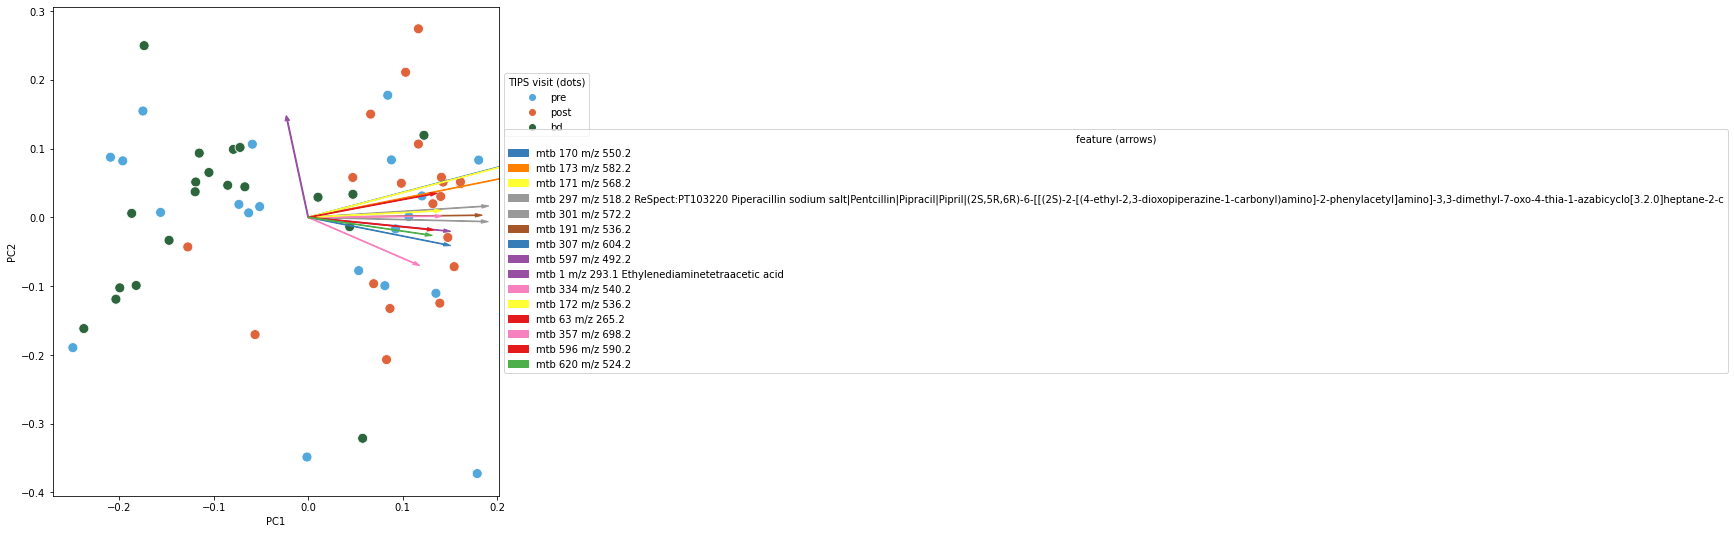

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(8, 9))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df,
            fpca_df, 'ATTRIBUTE_blood_procedure', ax)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/SFR22_0304_biplot_perifAll_warrows.pdf',
            dpi=300,bbox_inches='tight')

In [ ]:
!qurro\
    --ranks /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-peripheral/ordination.txt\
    --table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.biom\
    --sample-metadata /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral.txt\
    --feature-metadata /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean.txt\
    --output-dir qurro_deicode_peripheral


qiime qurro loading-plot \
    --i-table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.qza \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-peripheral.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean_v2.txt \
    --o-visualization qurro_deicode_peripheral_v2.qzv

now peripheral but just pre vs post

In [19]:
! biom convert \
  -i /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-prepost.txt \
  -o /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-prepost.biom \
  --table-type="OTU table" \
  --to-hdf5

! qiime tools import \
  --input-path /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-prepost.biom \
  --output-path /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-prepost.qza \
  --type FeatureTable[Frequency]

Imported /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-prepost.biom as BIOMV210DirFmt to /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-prepost.qza


In [20]:
! qiime deicode rpca \
    --i-table /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-prepost.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral-prepost.qza \
    --o-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-prepost.qza

Saved PCoAResults % Properties('biplot') to: /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral-prepost.qza
Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-prepost.qza


In [21]:
! qiime emperor biplot \
    --i-biplot /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral-prepost.qza \
    --m-sample-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral-prepost.txt \
    --p-ignore-missing-samples \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/biplot-peripheral-prepost.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/biplot-peripheral-prepost.qzv


In [22]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-prepost.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-prepost

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-prepost.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-prepost


In [23]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral-prepost.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral-prepost

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral-prepost.qza as OrdinationDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral-prepost


In [24]:
 ! qiime diversity beta-group-significance \
    --i-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-prepost.qza \
    --m-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral-prepost.txt \
    --m-metadata-column ATTRIBUTE_blood_procedure \
    --p-method permanova \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-prepost-significance.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-prepost-significance.qzv


In [ ]:
qiime qurro loading-plot \
    --i-table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-prepost.qza \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-peripheral-prepost.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral-prepost.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean.txt \
    --o-visualization qurro_deicode_peripheral_prepost.qzv

Visualize with a biplot

In [34]:
# import the sample metadata
mf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral-prepost.txt',
                 sep='\t', index_col=0)
# import the taxonomy metadata
tf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean.txt',
                 sep='\t', index_col=0)
tf.reset_index(drop=True, inplace=True)
tf.tail(2)

,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,Compound_Name,feature_name
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mtb 790 m/z 455
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mtb 791 m/z 539.3


In [35]:
from biom import load_table
from deicode.rpca import auto_rpca

# import the data table
table = load_table('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-prepost.biom')
# perform RPCA with auto. rank estimation
ordination, distance = auto_rpca(table)

In [36]:
# the sample loadings
spca_df = ordination.samples
spca_df.head(2)

,PC1,PC2,PC3
s1_BD6_01_51095.mzXML Peak area,-0.09196,0.042761,0
s47_repeat_BB5_01_51298.mzXML Peak area,0.00348,-0.034314,0


In [37]:
# the feature loadings
fpca_df = ordination.features
fpca_df.reset_index(drop=True, inplace=True)
fpca_df.head(2)

,PC1,PC2,PC3
0,-0.008233,-0.135751,0
1,-0.058740,0.106242,0


In [38]:
# merge the sample metadata and loadings
spca_df = pd.concat([spca_df, mf.reindex(spca_df.index)],
                    axis=1, sort=True)
spca_df.head(2)

,PC1,PC2,PC3,ATTRIBUTE_pt_id,ATTRIBUTE_sample_id,ATTRIBUTE_plate,ATTRIBUTE_dilution,ATTRIBUTE_folder_type,ATTRIBUTE_sample_id_lcms,ATTRIBUTE_plate_location,...,ATTRIBUTE_PreTIPS_ammonia,ATTRIBUTE_PostTIPS_ammonia,ATTRIBUTE_X,ATTRIBUTE_PreTIPS_HE_mod,ATTRIBUTE_Worst_PreTIPS_HE_mod,ATTRIBUTE_PostTIPS_HE_mod,ATTRIBUTE_Worst_PostTIPS_HE_mod,ATTRIBUTE_tx_HE_preTIPS,ATTRIBUTE_tx_HE_hospital,ATTRIBUTE_tx_HE_postTIPS
s102_BB8_01_51048.mzXML Peak area,-0.131598,0.171924,0,2_b,102,plate1_2x,2x,data,s102,BB8,...,NaN,NaN,NaN,1,1,0,2+,NaN,NaN,NaN
s109_repeat_BC8_01_51291.mzXML Peak area,-0.278782,-0.144571,0,4_b,109,plate2_2x,2x,data,s109,BC8,...,NaN,83.0,104.0,1,2+,1,2+,NaN,NaN,NaN


In [39]:
# merge the feature metadata and loadings

fpca_df = pd.concat([fpca_df, tf.reindex(fpca_df.index)],
                    axis=1)
fpca_df.head(2)

,PC1,PC2,PC3,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,Compound_Name,feature_name
0,-0.008233,-0.135751,0,Organic acids and derivatives,Carboxylic acids and derivatives,Tetracarboxylic acids and derivatives,Small peptides,Aminoacids,Amino acids and Peptides,Ethylenediaminetetraacetic acid,mtb 1 m/z 293.1 Ethylenediaminetetraacetic acid
1,-0.058740,0.106242,0,Organoheterocyclic compounds,Lactams,Beta lactams,β-lactams,Cephalosporins,Amino acids and Peptides,Ceftriaxone,mtb 2 m/z 555.1 Ceftriaxone


In [40]:
def biplot(axis1, axis2, sload, fload, hue, ax,
           n_arrow= 15, cmap = 'Set1'):
    
    """
    This function is a helper for the tutorial. It
    takes ordination inputs from the tutorial and
    plots a compositional biplot.
    
    Parameters
    ----------
    axis1: str - first x-PC axis
    axis2: str - second y-PC axis
    
    sload: pd.DataFrame - sample ordination
    fload: pd.DataFrame - feature ordination
    hue: str - subject groupings
        
    ax: matplitlib subplot
    n_arrow: int - number of arrows to plot
    level: int - taxonomic level to collapse
    Returns
    ----------
    ax: matplitlib subplot
    """
    # Create an array with the colors you want to use
    colors = ["#52A7DC","#DF643B"]
    # Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    
    # sort the arrows by their PC1, PC2 mag.
    fload['magnitude'] = np.linalg.norm(fload[[axis1, axis2]], axis=1)
    fload = fload.sort_values('magnitude', ascending=False)
    
    # get cmap for arrows
    arrow_cmap = set(fload.loc[fload.index[: n_arrow], 'feature_name'].values)
    colors_ = plt.get_cmap(cmap, len(arrow_cmap))
    arrow_cmap = {v:colors_(i) for i, v in enumerate(arrow_cmap)}
    

 # plot the sample loadings
    sns.scatterplot(axis1, axis2,
                    data = sload,
                    hue = hue,
                    hue_order = ['pre', 'post'],
                    palette=colors,
                    ax=ax,
                    s=100)
    
    # plot the arrows
    legend_arrows = {}
    for i in range(n_arrow):
        # add arrow
        ind_ = fload.index[i]
        arrow_  = ax.arrow(0, 0, fload.loc[ind_, axis1],
                        fload.loc[ind_, axis2],
                        color=arrow_cmap[fload.loc[ind_, 'feature_name']],
                        width=0.001, head_width=0.005)
        legend_arrows[fload.loc[ind_, 'feature_name']] = arrow_
    
    # add legend
    leg1 = ax.legend(loc='center left',
                     bbox_to_anchor=(1, .8),
                     title="TIPS visit (dots)")
    ax.legend(list(legend_arrows.values()),
              list(legend_arrows.keys()), 
              loc='center left',
              bbox_to_anchor=(1, 0.5),
              title="feature (arrows)")
    ax.add_artist(leg1)
    
    #modify individual font size of elements
    #ax.tick_params(axis='both', which='major', labelsize=0.5)
        
    return ax

/opt/anaconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


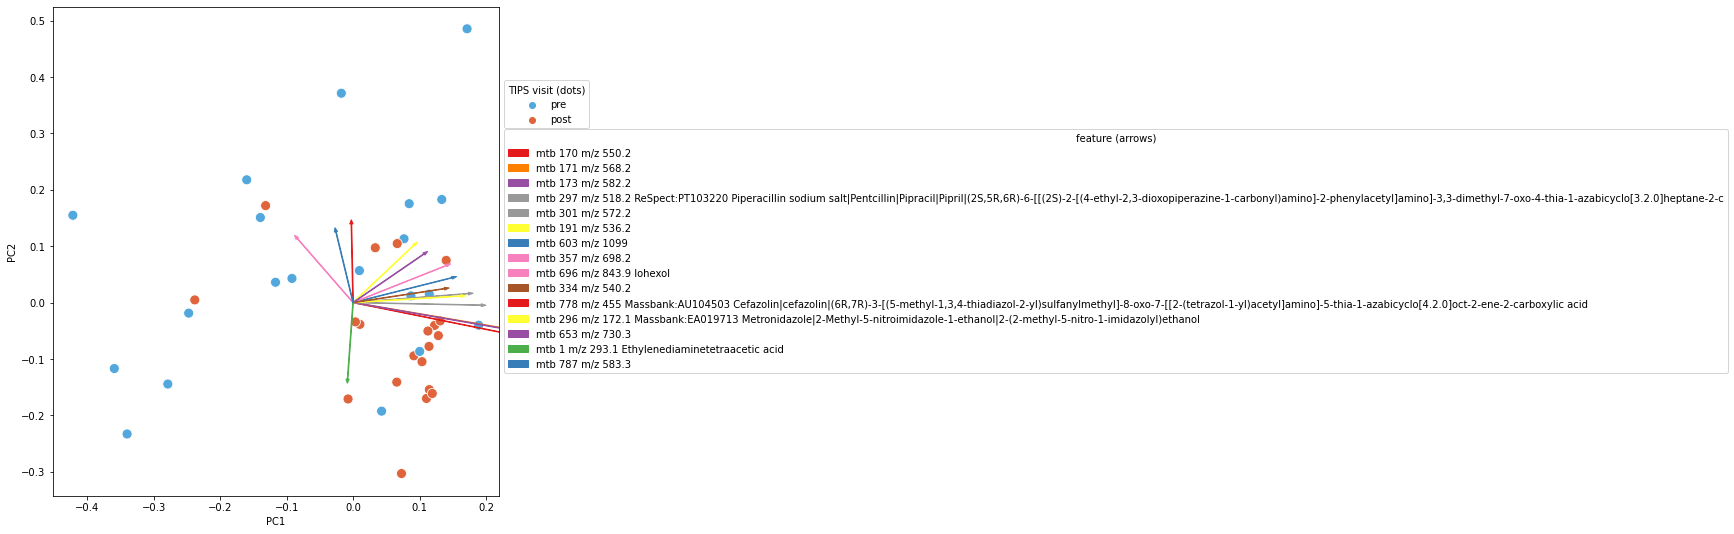

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(8, 9))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df,
            fpca_df, 'ATTRIBUTE_blood_procedure', ax)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/SFR22_0304_biplot_perifPrepost_warrows.pdf',
            dpi=300,bbox_inches='tight')

now just peripheral post vs. BD

In [12]:
! biom convert \
  -i /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-postbd.txt \
  -o /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-postbd.biom \
  --table-type="OTU table" \
  --to-hdf5

! qiime tools import \
  --input-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-postbd.biom \
  --output-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-postbd.qza \
  --type FeatureTable[Frequency]

Imported /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.biom as BIOMV210DirFmt to /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.qza


In [14]:
! qiime deicode rpca \
    --i-table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-postbd.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-peripheral-postbd.qza \
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-postbd.qza

Saved PCoAResults % Properties('biplot') to: /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral.qza
Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral.qza


In [15]:
! qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-peripheral-postbd.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral-postbd.txt \
    --p-ignore-missing-samples \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/biplot-peripheral-postbd.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/biplot-peripheral.qzv


In [16]:
! qiime tools export \
--input-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-postbd.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-postbd

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral


In [17]:
! qiime tools export \
--input-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-peripheral-postbd.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-peripheral-postbd

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral.qza as OrdinationDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-peripheral


In [18]:
 ! qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-postbd.qza \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral-postbd.txt \
    --m-metadata-column ATTRIBUTE_blood_procedure \
    --p-method permanova \
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-postbd-significance.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_peripheral-significance.qzv


In [ ]:
!qurro\
    --ranks /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-peripheral-postbd/ordination.txt\
    --table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-postbd.biom\
    --sample-metadata /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral-postbd.txt\
    --feature-metadata /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean_v2.txt\
    --output-dir /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/qurro_deicode_peripheral_postbd.qzv


qiime qurro loading-plot \
    --i-table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-postbd.qza \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-peripheral-postbd.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-peripheral-postbd.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean_v2.txt \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/qurro_deicode_peripheral_postbd.qzv

now we run it on the hepatic blood samples

In [25]:
! biom convert \
  -i /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.txt \
  -o /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.biom \
  --table-type="OTU table" \
  --to-hdf5

! qiime tools import \
  --input-path /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.biom \
  --output-path /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.qza \
  --type FeatureTable[Frequency]

Imported /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.biom as BIOMV210DirFmt to /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.qza


In [26]:
! qiime deicode rpca \
    --i-table /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-hepatic.qza \
    --o-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic.qza

Saved PCoAResults % Properties('biplot') to: /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-hepatic.qza
Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic.qza


In [27]:
! qiime emperor biplot \
    --i-biplot /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-hepatic.qza \
    --m-sample-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-hepatic.txt \
    --p-ignore-missing-samples \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/biplot-hepatic.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/biplot-hepatic.qzv


In [28]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic


In [29]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-hepatic.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-hepatic

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-hepatic.qza as OrdinationDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-hepatic


In [30]:
! qiime diversity beta-group-significance \
    --i-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic.qza \
    --m-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-hepatic.txt \
    --m-metadata-column ATTRIBUTE_blood_procedure \
    --p-method permanova \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic-significance.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic-significance.qzv


In [ ]:
qiime qurro loading-plot \
    --i-table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.qza \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-hepatic.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-hepatic.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean.txt \
    --o-visualization qurro_deicode_hepatic.qzv

now visualize with a biplot

In [63]:
# import the sample metadata
mf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-hepatic.txt',
                 sep='\t', index_col=0)
# import the taxonomy metadata
tf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean.txt',
                 sep='\t', index_col=0)
tf.reset_index(drop=True, inplace=True)
tf.tail(2)

,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,Compound_Name,feature_name
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mtb 790 m/z 455
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mtb 791 m/z 539.3


In [64]:
from biom import load_table
from deicode.rpca import auto_rpca

# import the data table
table = load_table('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.biom')
# perform RPCA with auto. rank estimation
ordination, distance = auto_rpca(table)

In [65]:
# the sample loadings
spca_df = ordination.samples
spca_df.head(2)

,PC1,PC2,PC3
s2_BE6_01_51119.mzXML Peak area,-0.034000,0.030104,0
s97_BG2_01_51481.mzXML Peak area,0.609631,-0.290476,0


In [66]:
# the feature loadings
fpca_df = ordination.features
fpca_df.reset_index(drop=True, inplace=True)
fpca_df.head(2)

,PC1,PC2,PC3
0,-0.130138,0.142196,0
1,0.062541,-0.095534,0


In [67]:
# merge the sample metadata and loadings
spca_df = pd.concat([spca_df, mf.reindex(spca_df.index)],
                    axis=1, sort=True)
spca_df.head(2)

,PC1,PC2,PC3,ATTRIBUTE_pt_id,ATTRIBUTE_sample_id,ATTRIBUTE_plate,ATTRIBUTE_dilution,ATTRIBUTE_folder_type,ATTRIBUTE_sample_id_lcms,ATTRIBUTE_plate_location,...,ATTRIBUTE_PreTIPS_ammonia,ATTRIBUTE_PostTIPS_ammonia,ATTRIBUTE_X,ATTRIBUTE_PreTIPS_HE_mod,ATTRIBUTE_Worst_PreTIPS_HE_mod,ATTRIBUTE_PostTIPS_HE_mod,ATTRIBUTE_Worst_PostTIPS_HE_mod,ATTRIBUTE_tx_HE_preTIPS,ATTRIBUTE_tx_HE_hospital,ATTRIBUTE_tx_HE_postTIPS
s100_rerun_BA6_01_51158.mzXML Peak area,0.039318,-0.027460,0,2_b,100,plate2_2x,2x,data,s100,BA6,...,NaN,NaN,NaN,1,1,0,2+,NaN,NaN,NaN
s101_BA9_01_51025.mzXML Peak area,0.052485,-0.151767,0,2_b,101,plate1_2x,2x,data,s101,BA9,...,NaN,NaN,NaN,1,1,0,2+,NaN,NaN,NaN


In [68]:
# merge the feature metadata and loadings

fpca_df = pd.concat([fpca_df, tf.reindex(fpca_df.index)],
                    axis=1)
fpca_df.head(2)

,PC1,PC2,PC3,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,Compound_Name,feature_name
0,-0.130138,0.142196,0,Organic acids and derivatives,Carboxylic acids and derivatives,Tetracarboxylic acids and derivatives,Small peptides,Aminoacids,Amino acids and Peptides,Ethylenediaminetetraacetic acid,mtb 1 m/z 293.1 Ethylenediaminetetraacetic acid
1,0.062541,-0.095534,0,Organoheterocyclic compounds,Lactams,Beta lactams,β-lactams,Cephalosporins,Amino acids and Peptides,Ceftriaxone,mtb 2 m/z 555.1 Ceftriaxone


In [69]:
def biplot(axis1, axis2, sload, fload, hue, ax,
           n_arrow= 15, cmap = 'Set1'):
    
    """
    This function is a helper for the tutorial. It
    takes ordination inputs from the tutorial and
    plots a compositional biplot.
    
    Parameters
    ----------
    axis1: str - first x-PC axis
    axis2: str - second y-PC axis
    
    sload: pd.DataFrame - sample ordination
    fload: pd.DataFrame - feature ordination
    hue: str - subject groupings
        
    ax: matplitlib subplot
    n_arrow: int - number of arrows to plot
    level: int - taxonomic level to collapse
    Returns
    ----------
    ax: matplitlib subplot
    """
    # Create an array with the colors you want to use
    colors = ["#52A7DC","#DF643B"]
    # Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    
    # sort the arrows by their PC1, PC2 mag.
    fload['magnitude'] = np.linalg.norm(fload[[axis1, axis2]], axis=1)
    fload = fload.sort_values('magnitude', ascending=False)
    
    # get cmap for arrows
    arrow_cmap = set(fload.loc[fload.index[: n_arrow], 'feature_name'].values)
    colors_ = plt.get_cmap(cmap, len(arrow_cmap))
    arrow_cmap = {v:colors_(i) for i, v in enumerate(arrow_cmap)}
    

 # plot the sample loadings
    sns.scatterplot(axis1, axis2,
                    data = sload,
                    hue = hue,
                    hue_order = ['pre', 'post'],
                    palette=colors,
                    ax=ax,
                    s=100)
    
    # plot the arrows
    legend_arrows = {}
    for i in range(n_arrow):
        # add arrow
        ind_ = fload.index[i]
        arrow_  = ax.arrow(0, 0, fload.loc[ind_, axis1],
                        fload.loc[ind_, axis2],
                        color=arrow_cmap[fload.loc[ind_, 'feature_name']],
                        width=0.001, head_width=0.005)
        legend_arrows[fload.loc[ind_, 'feature_name']] = arrow_
    
    # add legend
    leg1 = ax.legend(loc='center left',
                     bbox_to_anchor=(1, .8),
                     title="TIPS visit (dots)")
    ax.legend(list(legend_arrows.values()),
              list(legend_arrows.keys()), 
              loc='center left',
              bbox_to_anchor=(1, 0.5),
              title="feature (arrows)")
    ax.add_artist(leg1)
    
    #modify individual font size of elements
    #ax.tick_params(axis='both', which='major', labelsize=0.5)
        
    return ax

/opt/anaconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


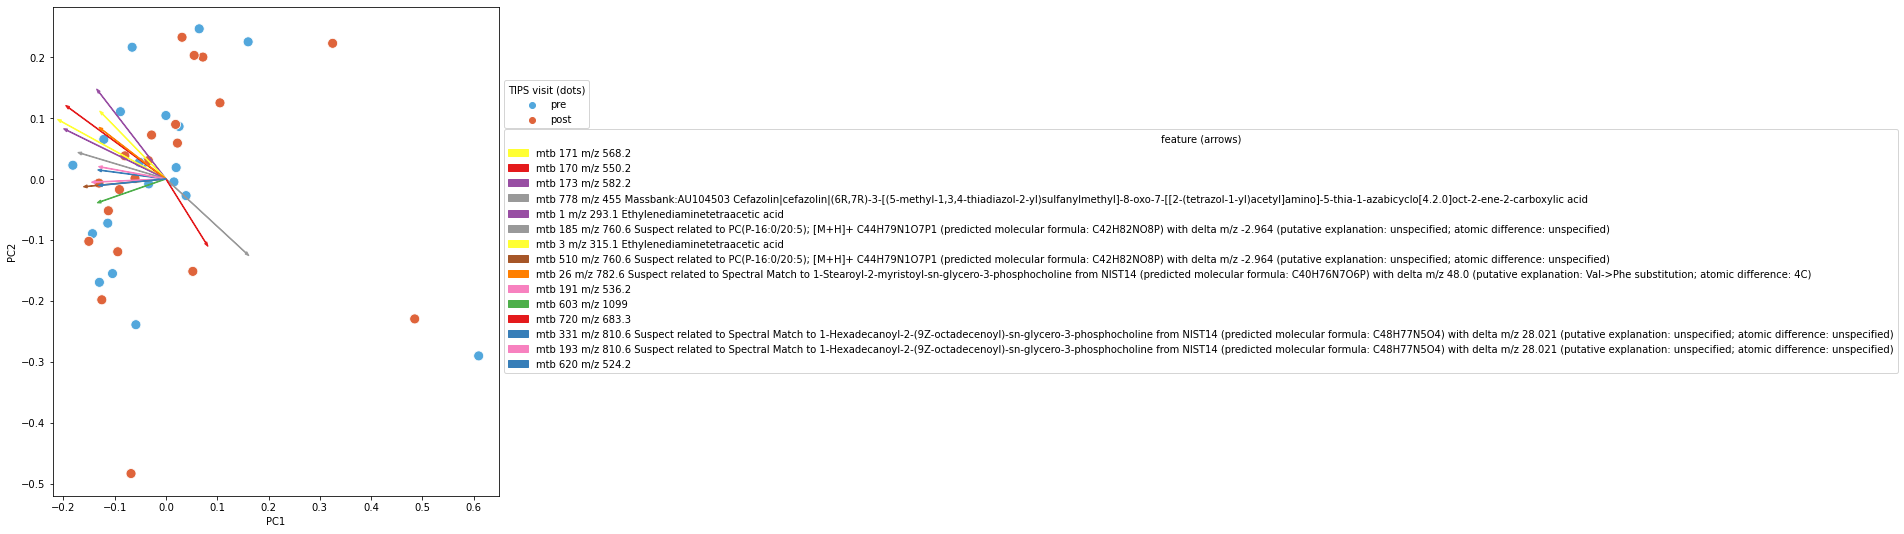

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(8, 9))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df,
            fpca_df, 'ATTRIBUTE_blood_procedure', ax)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/SFR22_0304_biplot_hepatic_warrows.pdf',
            dpi=300,bbox_inches='tight')

now we run it on the hepatic blood samples removing serum sample (1_b)

In [25]:
! biom convert \
  -i /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic-rmoutlier.txt \
  -o /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic-rmoutlier.biom \
  --table-type="OTU table" \
  --to-hdf5

! qiime tools import \
  --input-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic-rmoutlier.biom \
  --output-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic-rmoutlier.qza \
  --type FeatureTable[Frequency]

Imported /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.biom as BIOMV210DirFmt to /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.qza


In [26]:
! qiime deicode rpca \
    --i-table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic-rmoutlier.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-hepatic-rmoutlier.qza \
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic-rmoutlier.qza

Saved PCoAResults % Properties('biplot') to: /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-hepatic.qza
Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic.qza


In [27]:
! qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-hepatic-rmoutlier.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-hepatic-rmoutlier.txt \
    --p-ignore-missing-samples \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/biplot-hepatic-rmoutlier.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/biplot-hepatic.qzv


In [28]:
! qiime tools export \
--input-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic-rmoutlier.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic-rmoutlier

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic


In [29]:
! qiime tools export \
--input-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-hepatic-rmoutlier.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-hepatic-rmoutlier

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-hepatic.qza as OrdinationDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-hepatic


In [30]:
! qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic-rmoutlier.qza \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-hepatic-rmoutlier.txt \
    --m-metadata-column ATTRIBUTE_blood_procedure \
    --p-method permanova \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic-rmoutlier-significance.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_hepatic-significance.qzv


just run it on the post TIPS sample

In [31]:
! biom convert \
  -i /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-post.txt \
  -o /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-post.biom \
  --table-type="OTU table" \
  --to-hdf5

! qiime tools import \
  --input-path /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-post.biom \
  --output-path /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-post.qza \
  --type FeatureTable[Frequency]

Imported /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-post.biom as BIOMV210DirFmt to /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-post.qza


In [32]:
! qiime deicode rpca \
    --i-table /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-post.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-post.qza \
    --o-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post.qza

Saved PCoAResults % Properties('biplot') to: /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-post.qza
Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post.qza


In [33]:
! qiime emperor biplot \
    --i-biplot /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-post.qza \
    --m-sample-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-post.txt \
    --p-ignore-missing-samples \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/biplot-post.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/biplot-post.qzv


In [34]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post


In [35]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-post.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-post

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-post.qza as OrdinationDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-post


In [36]:
! qiime diversity beta-group-significance \
    --i-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post.qza \
    --m-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-post.txt \
    --m-metadata-column WPostTIPS_HE \
    --p-method permanova \
    --p-pairwise \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post-significance.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post-significance.qzv


In [ ]:
qiime qurro loading-plot \
    --i-table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-post.qza \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-post.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-post.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean.txt \
    --o-visualization qurro_deicode_post.qzv

visualize with a biplot

In [82]:
# import the sample metadata
mf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-post.txt',
                 sep='\t', index_col=0)
# import the taxonomy metadata
tf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean.txt',
                 sep='\t', index_col=0)
tf.reset_index(drop=True, inplace=True)
tf.tail(2)

,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,Compound_Name,feature_name
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mtb 790 m/z 455
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mtb 791 m/z 539.3


In [83]:
from biom import load_table
from deicode.rpca import auto_rpca

# import the data table
table = load_table('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-post.biom')
# perform RPCA with auto. rank estimation
ordination, distance = auto_rpca(table)

In [84]:
# the sample loadings
spca_df = ordination.samples
spca_df.head(2)

,PC1,PC2,PC3
s2_BE6_01_51119.mzXML Peak area,-0.002637,-0.028051,0
s98_BG3_01_51483.mzXML Peak area,0.580532,0.308344,0


In [85]:
# the feature loadings
fpca_df = ordination.features
fpca_df.reset_index(drop=True, inplace=True)
fpca_df.head(2)

,PC1,PC2,PC3
0,-0.074027,-0.144479,0
1,0.218626,0.094797,0


In [86]:
# merge the sample metadata and loadings
spca_df = pd.concat([spca_df, mf.reindex(spca_df.index)],
                    axis=1, sort=True)
spca_df.head(2)

,PC1,PC2,PC3,ATTRIBUTE_pt_id,ATTRIBUTE_sample_id,ATTRIBUTE_plate,ATTRIBUTE_dilution,ATTRIBUTE_folder_type,ATTRIBUTE_sample_id_lcms,ATTRIBUTE_plate_location,...,ATTRIBUTE_PostTIPS_ammonia,ATTRIBUTE_X,ATTRIBUTE_PreTIPS_HE_mod,ATTRIBUTE_Worst_PreTIPS_HE_mod,ATTRIBUTE_PostTIPS_HE_mod,ATTRIBUTE_Worst_PostTIPS_HE_mod,ATTRIBUTE_tx_HE_preTIPS,ATTRIBUTE_tx_HE_hospital,ATTRIBUTE_tx_HE_postTIPS,WPostTIPS_HE
s101_BA9_01_51025.mzXML Peak area,0.166088,0.254226,0,2_b,101,plate1_2x,2x,data,s101,BA9,...,NaN,NaN,1,1,0,2+,NaN,NaN,NaN,2+
s102_BB8_01_51048.mzXML Peak area,0.203724,0.220715,0,2_b,102,plate1_2x,2x,data,s102,BB8,...,NaN,NaN,1,1,0,2+,NaN,NaN,NaN,2+


In [87]:
# merge the feature metadata and loadings

fpca_df = pd.concat([fpca_df, tf.reindex(fpca_df.index)],
                    axis=1)
fpca_df.head(2)

,PC1,PC2,PC3,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,Compound_Name,feature_name
0,-0.074027,-0.144479,0,Organic acids and derivatives,Carboxylic acids and derivatives,Tetracarboxylic acids and derivatives,Small peptides,Aminoacids,Amino acids and Peptides,Ethylenediaminetetraacetic acid,mtb 1 m/z 293.1 Ethylenediaminetetraacetic acid
1,0.218626,0.094797,0,Organoheterocyclic compounds,Lactams,Beta lactams,β-lactams,Cephalosporins,Amino acids and Peptides,Ceftriaxone,mtb 2 m/z 555.1 Ceftriaxone


In [60]:
def biplot(axis1, axis2, sload, fload, hue, ax,
           n_arrow= 15, cmap = 'Set1'):
    
    """
    This function is a helper for the tutorial. It
    takes ordination inputs from the tutorial and
    plots a compositional biplot.
    
    Parameters
    ----------
    axis1: str - first x-PC axis
    axis2: str - second y-PC axis
    
    sload: pd.DataFrame - sample ordination
    fload: pd.DataFrame - feature ordination
    hue: str - subject groupings
        
    ax: matplitlib subplot
    n_arrow: int - number of arrows to plot
    level: int - taxonomic level to collapse
    Returns
    ----------
    ax: matplitlib subplot
    """
    # Create an array with the colors you want to use
    colors = ["#2E3192","#EE207C"]
    # Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    
    # sort the arrows by their PC1, PC2 mag.
    fload['magnitude'] = np.linalg.norm(fload[[axis1, axis2]], axis=1)
    fload = fload.sort_values('magnitude', ascending=False)
    
    # get cmap for arrows
    arrow_cmap = set(fload.loc[fload.index[: n_arrow], 'feature_name'].values)
    colors_ = plt.get_cmap(cmap, len(arrow_cmap))
    arrow_cmap = {v:colors_(i) for i, v in enumerate(arrow_cmap)}
    

 # plot the sample loadings
    sns.scatterplot(axis1, axis2,
                    data = sload,
                    hue = hue,
                    hue_order = ['peripheral', 'hepatic'],
                    palette=colors,
                    ax=ax,
                    s=100)
    
    # plot the arrows
    legend_arrows = {}
    for i in range(n_arrow):
        # add arrow
        ind_ = fload.index[i]
        arrow_  = ax.arrow(0, 0, fload.loc[ind_, axis1],
                        fload.loc[ind_, axis2],
                        color=arrow_cmap[fload.loc[ind_, 'feature_name']],
                        width=0.001, head_width=0.005)
        legend_arrows[fload.loc[ind_, 'feature_name']] = arrow_
    
    # add legend
    leg1 = ax.legend(loc='center left',
                     bbox_to_anchor=(1, .8),
                     title="TIPS visit (dots)")
    ax.legend(list(legend_arrows.values()),
              list(legend_arrows.keys()), 
              loc='center left',
              bbox_to_anchor=(1, 0.5),
              title="feature (arrows)")
    ax.add_artist(leg1)
    
    #modify individual font size of elements
    #ax.tick_params(axis='both', which='major', labelsize=0.5)
        
    return ax

/opt/anaconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


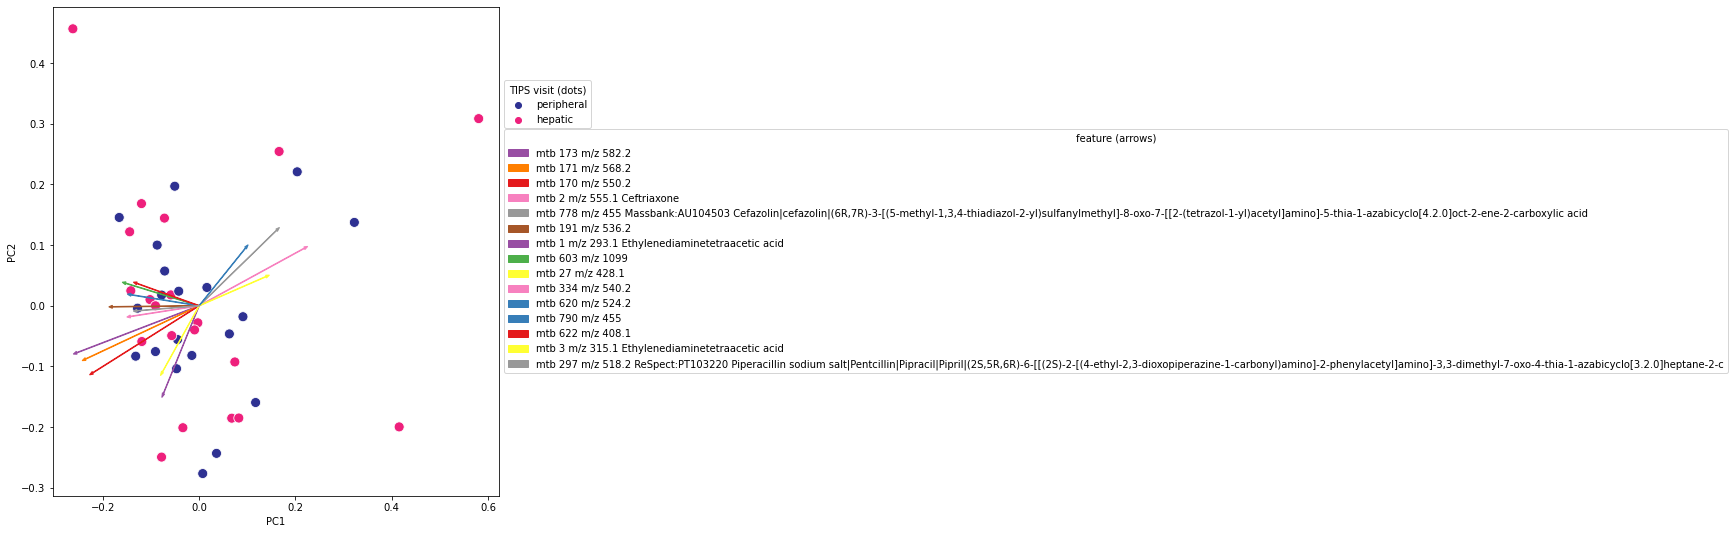

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(8, 9))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df,
            fpca_df, 'ATTRIBUTE_blood_origin', ax)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/SFR22_0304_biplot_postBldOrg_warrows.pdf',
            dpi=300,bbox_inches='tight')

In [88]:
def biplot(axis1, axis2, sload, fload, hue, ax,
           n_arrow= 15, cmap = 'Set1'):
    
    """
    This function is a helper for the tutorial. It
    takes ordination inputs from the tutorial and
    plots a compositional biplot.
    
    Parameters
    ----------
    axis1: str - first x-PC axis
    axis2: str - second y-PC axis
    
    sload: pd.DataFrame - sample ordination
    fload: pd.DataFrame - feature ordination
    hue: str - subject groupings
        
    ax: matplitlib subplot
    n_arrow: int - number of arrows to plot
    level: int - taxonomic level to collapse
    Returns
    ----------
    ax: matplitlib subplot
    """
    # Create an array with the colors you want to use
    colors = ["#DC4D40","#754B27","#60B358"]
    # Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    
    # sort the arrows by their PC1, PC2 mag.
    fload['magnitude'] = np.linalg.norm(fload[[axis1, axis2]], axis=1)
    fload = fload.sort_values('magnitude', ascending=False)
    
    # get cmap for arrows
    arrow_cmap = set(fload.loc[fload.index[: n_arrow], 'feature_name'].values)
    colors_ = plt.get_cmap(cmap, len(arrow_cmap))
    arrow_cmap = {v:colors_(i) for i, v in enumerate(arrow_cmap)}
    

 # plot the sample loadings
    sns.scatterplot(axis1, axis2,
                    data = sload,
                    hue = hue,
                    hue_order = ['0', '1','2+'],
                    palette=colors,
                    ax=ax,
                    s=100)
    
    # plot the arrows
    legend_arrows = {}
    for i in range(n_arrow):
        # add arrow
        ind_ = fload.index[i]
        arrow_  = ax.arrow(0, 0, fload.loc[ind_, axis1],
                        fload.loc[ind_, axis2],
                        color=arrow_cmap[fload.loc[ind_, 'feature_name']],
                        width=0.001, head_width=0.005)
        legend_arrows[fload.loc[ind_, 'feature_name']] = arrow_
    
    # add legend
    leg1 = ax.legend(loc='center left',
                     bbox_to_anchor=(1, .8),
                     title="TIPS visit (dots)")
    ax.legend(list(legend_arrows.values()),
              list(legend_arrows.keys()), 
              loc='center left',
              bbox_to_anchor=(1, 0.5),
              title="feature (arrows)")
    ax.add_artist(leg1)
    
    #modify individual font size of elements
    #ax.tick_params(axis='both', which='major', labelsize=0.5)
        
    return ax

/opt/anaconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


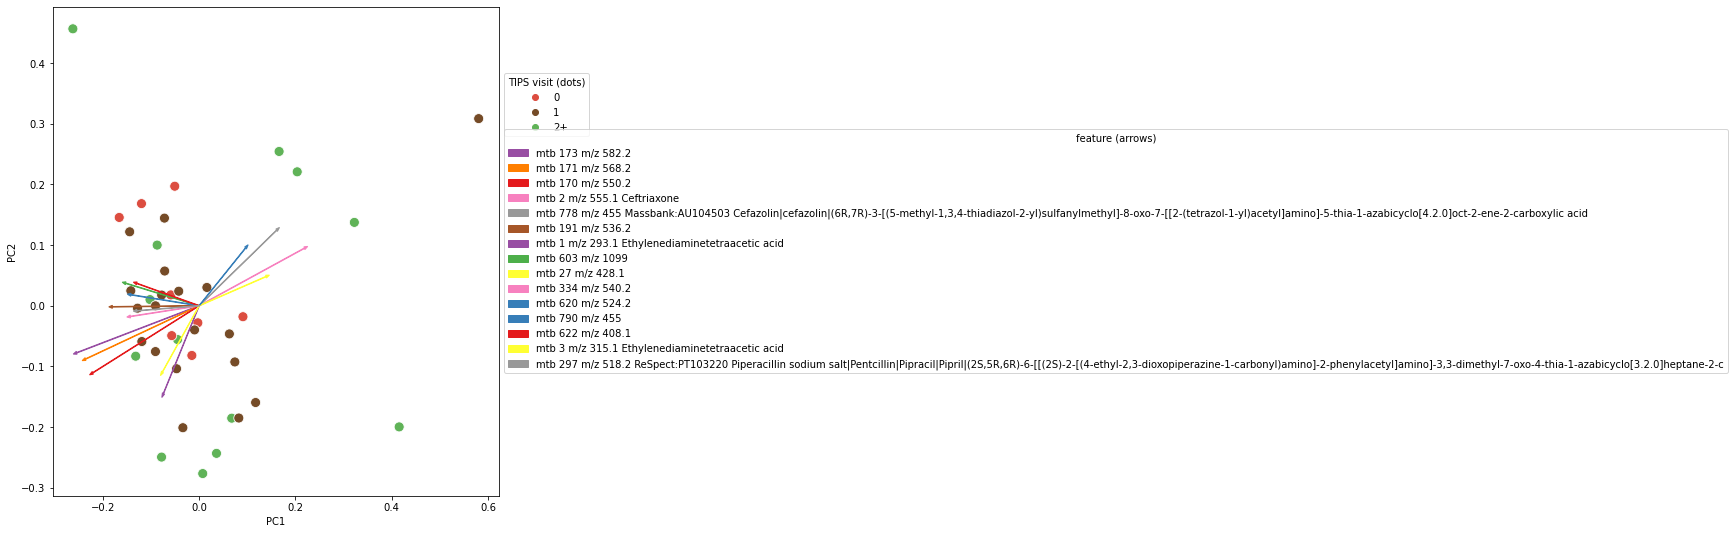

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(8, 9))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df,
            fpca_df, 'ATTRIBUTE_Worst_PostTIPS_HE_mod', ax)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/SFR22_0304_biplot_postHEgrade_warrows.pdf',
            dpi=300,bbox_inches='tight')

just run it on the pre TIPS sample

In [31]:
! biom convert \
  -i /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-pre.txt \
  -o /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-pre.biom \
  --table-type="OTU table" \
  --to-hdf5

! qiime tools import \
  --input-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-pre.biom \
  --output-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-pre.qza \
  --type FeatureTable[Frequency]

Imported /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-post.biom as BIOMV210DirFmt to /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-post.qza


In [32]:
! qiime deicode rpca \
    --i-table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-pre.qza \
    --p-min-feature-count 10 \
    --p-min-sample-count 500 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-pre.qza \
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_pre.qza

Saved PCoAResults % Properties('biplot') to: /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-post.qza
Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post.qza


In [33]:
! qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-pre.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-pre.txt \
    --p-ignore-missing-samples \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/biplot-pre.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/biplot-post.qzv


In [34]:
! qiime tools export \
--input-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_pre.qza \
--output-path //mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_pre

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post


In [35]:
! qiime tools export \
--input-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-pre.qza \
--output-path /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-pre

Exported /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-post.qza as OrdinationDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/ordination-post


In [36]:
! qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_pre.qza \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-pre.txt \
    --m-metadata-column WPostTIPS_HE \
    --p-method permanova \
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_pre-significance.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_deicode_lcms_post-significance.qzv


In [ ]:
qiime qurro loading-plot \
    --i-table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-pre.qza \
    --i-ranks /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/ordination-pre.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-pre.txt \
    --m-feature-metadata-file /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean.txt \
    --o-visualization qurro_deicode_pre.qzv

visualize the biplot

In [72]:
# import the sample metadata
mf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/metadata_table/metadata_table-pre.txt',
                 sep='\t', index_col=0)
# import the taxonomy metadata
tf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/DB_result/spectral_matches_clean.txt',
                 sep='\t', index_col=0)
tf.reset_index(drop=True, inplace=True)
tf.tail(2)

,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,Compound_Name,feature_name
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mtb 790 m/z 455
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mtb 791 m/z 539.3


In [73]:
from biom import load_table
from deicode.rpca import auto_rpca

# import the data table
table = load_table('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-pre.biom')
# perform RPCA with auto. rank estimation
ordination, distance = auto_rpca(table)

In [74]:
# the sample loadings
spca_df = ordination.samples
spca_df.head(2)

,PC1,PC2,PC3
s1_BD6_01_51095.mzXML Peak area,-0.056138,0.146878,0
s97_BG2_01_51481.mzXML Peak area,-0.481301,-0.222135,0


In [75]:
# the feature loadings
fpca_df = ordination.features
fpca_df.reset_index(drop=True, inplace=True)
fpca_df.head(2)

,PC1,PC2,PC3
0,0.045449,0.142122,0
1,-0.018727,-0.106213,0


In [76]:
# merge the sample metadata and loadings
spca_df = pd.concat([spca_df, mf.reindex(spca_df.index)],
                    axis=1, sort=True)
spca_df.head(2)

,PC1,PC2,PC3,ATTRIBUTE_pt_id,ATTRIBUTE_sample_id,ATTRIBUTE_plate,ATTRIBUTE_dilution,ATTRIBUTE_folder_type,ATTRIBUTE_sample_id_lcms,ATTRIBUTE_plate_location,...,ATTRIBUTE_PostTIPS_ammonia,ATTRIBUTE_X,ATTRIBUTE_PreTIPS_HE_mod,ATTRIBUTE_Worst_PreTIPS_HE_mod,ATTRIBUTE_PostTIPS_HE_mod,ATTRIBUTE_Worst_PostTIPS_HE_mod,ATTRIBUTE_tx_HE_preTIPS,ATTRIBUTE_tx_HE_hospital,ATTRIBUTE_tx_HE_postTIPS,WPostTIPS_HE
s100_rerun_BA6_01_51158.mzXML Peak area,-0.024151,-0.028377,0,2_b,100,plate2_2x,2x,data,s100,BA6,...,NaN,NaN,1,1,0,2+,NaN,NaN,NaN,2+
s109_repeat_BC8_01_51291.mzXML Peak area,-0.217787,0.214775,0,4_b,109,plate2_2x,2x,data,s109,BC8,...,83.0,104.0,1,2+,1,2+,NaN,NaN,NaN,2+


In [77]:
# merge the feature metadata and loadings

fpca_df = pd.concat([fpca_df, tf.reindex(fpca_df.index)],
                    axis=1)
fpca_df.head(2)

,PC1,PC2,PC3,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,Compound_Name,feature_name
0,0.045449,0.142122,0,Organic acids and derivatives,Carboxylic acids and derivatives,Tetracarboxylic acids and derivatives,Small peptides,Aminoacids,Amino acids and Peptides,Ethylenediaminetetraacetic acid,mtb 1 m/z 293.1 Ethylenediaminetetraacetic acid
1,-0.018727,-0.106213,0,Organoheterocyclic compounds,Lactams,Beta lactams,β-lactams,Cephalosporins,Amino acids and Peptides,Ceftriaxone,mtb 2 m/z 555.1 Ceftriaxone


In [78]:
def biplot(axis1, axis2, sload, fload, hue, ax,
           n_arrow= 15, cmap = 'Set1'):
    
    """
    This function is a helper for the tutorial. It
    takes ordination inputs from the tutorial and
    plots a compositional biplot.
    
    Parameters
    ----------
    axis1: str - first x-PC axis
    axis2: str - second y-PC axis
    
    sload: pd.DataFrame - sample ordination
    fload: pd.DataFrame - feature ordination
    hue: str - subject groupings
        
    ax: matplitlib subplot
    n_arrow: int - number of arrows to plot
    level: int - taxonomic level to collapse
    Returns
    ----------
    ax: matplitlib subplot
    """
    # Create an array with the colors you want to use
    colors = ["#2E3192","#EE207C"]
    # Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    
    # sort the arrows by their PC1, PC2 mag.
    fload['magnitude'] = np.linalg.norm(fload[[axis1, axis2]], axis=1)
    fload = fload.sort_values('magnitude', ascending=False)
    
    # get cmap for arrows
    arrow_cmap = set(fload.loc[fload.index[: n_arrow], 'feature_name'].values)
    colors_ = plt.get_cmap(cmap, len(arrow_cmap))
    arrow_cmap = {v:colors_(i) for i, v in enumerate(arrow_cmap)}
    

 # plot the sample loadings
    sns.scatterplot(axis1, axis2,
                    data = sload,
                    hue = hue,
                    hue_order = ['peripheral', 'hepatic'],
                    palette=colors,
                    ax=ax,
                    s=100)
    
    # plot the arrows
    legend_arrows = {}
    for i in range(n_arrow):
        # add arrow
        ind_ = fload.index[i]
        arrow_  = ax.arrow(0, 0, fload.loc[ind_, axis1],
                        fload.loc[ind_, axis2],
                        color=arrow_cmap[fload.loc[ind_, 'feature_name']],
                        width=0.001, head_width=0.005)
        legend_arrows[fload.loc[ind_, 'feature_name']] = arrow_
    
    # add legend
    leg1 = ax.legend(loc='center left',
                     bbox_to_anchor=(1, .8),
                     title="TIPS visit (dots)")
    ax.legend(list(legend_arrows.values()),
              list(legend_arrows.keys()), 
              loc='center left',
              bbox_to_anchor=(1, 0.5),
              title="feature (arrows)")
    ax.add_artist(leg1)
    
    #modify individual font size of elements
    #ax.tick_params(axis='both', which='major', labelsize=0.5)
        
    return ax

/opt/anaconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


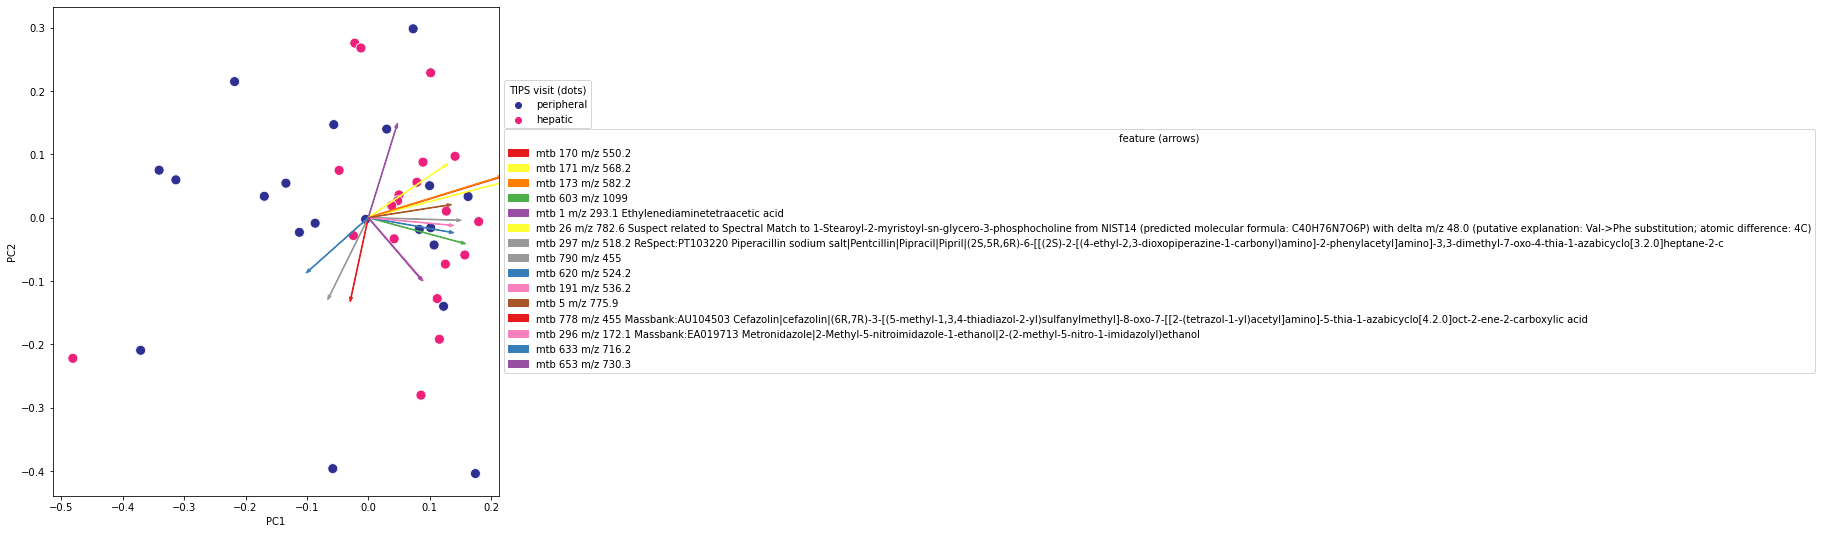

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(8, 9))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df,
            fpca_df, 'ATTRIBUTE_blood_origin', ax)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/SFR22_0304_biplot_preBldOrg_warrows.pdf',
            dpi=300,bbox_inches='tight')

In [80]:
def biplot(axis1, axis2, sload, fload, hue, ax,
           n_arrow= 15, cmap = 'Set1'):
    
    """
    This function is a helper for the tutorial. It
    takes ordination inputs from the tutorial and
    plots a compositional biplot.
    
    Parameters
    ----------
    axis1: str - first x-PC axis
    axis2: str - second y-PC axis
    
    sload: pd.DataFrame - sample ordination
    fload: pd.DataFrame - feature ordination
    hue: str - subject groupings
        
    ax: matplitlib subplot
    n_arrow: int - number of arrows to plot
    level: int - taxonomic level to collapse
    Returns
    ----------
    ax: matplitlib subplot
    """
    # Create an array with the colors you want to use
    colors = ["#DC4D40","#754B27","#60B358"]
    # Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    
    # sort the arrows by their PC1, PC2 mag.
    fload['magnitude'] = np.linalg.norm(fload[[axis1, axis2]], axis=1)
    fload = fload.sort_values('magnitude', ascending=False)
    
    # get cmap for arrows
    arrow_cmap = set(fload.loc[fload.index[: n_arrow], 'feature_name'].values)
    colors_ = plt.get_cmap(cmap, len(arrow_cmap))
    arrow_cmap = {v:colors_(i) for i, v in enumerate(arrow_cmap)}
    

 # plot the sample loadings
    sns.scatterplot(axis1, axis2,
                    data = sload,
                    hue = hue,
                    hue_order = ['0', '1','2+'],
                    palette=colors,
                    ax=ax,
                    s=100)
    
    # plot the arrows
    legend_arrows = {}
    for i in range(n_arrow):
        # add arrow
        ind_ = fload.index[i]
        arrow_  = ax.arrow(0, 0, fload.loc[ind_, axis1],
                        fload.loc[ind_, axis2],
                        color=arrow_cmap[fload.loc[ind_, 'feature_name']],
                        width=0.001, head_width=0.005)
        legend_arrows[fload.loc[ind_, 'feature_name']] = arrow_
    
    # add legend
    leg1 = ax.legend(loc='center left',
                     bbox_to_anchor=(1, .8),
                     title="TIPS visit (dots)")
    ax.legend(list(legend_arrows.values()),
              list(legend_arrows.keys()), 
              loc='center left',
              bbox_to_anchor=(1, 0.5),
              title="feature (arrows)")
    ax.add_artist(leg1)
    
    #modify individual font size of elements
    #ax.tick_params(axis='both', which='major', labelsize=0.5)
        
    return ax

/opt/anaconda3/envs/qiime2-2020.11/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


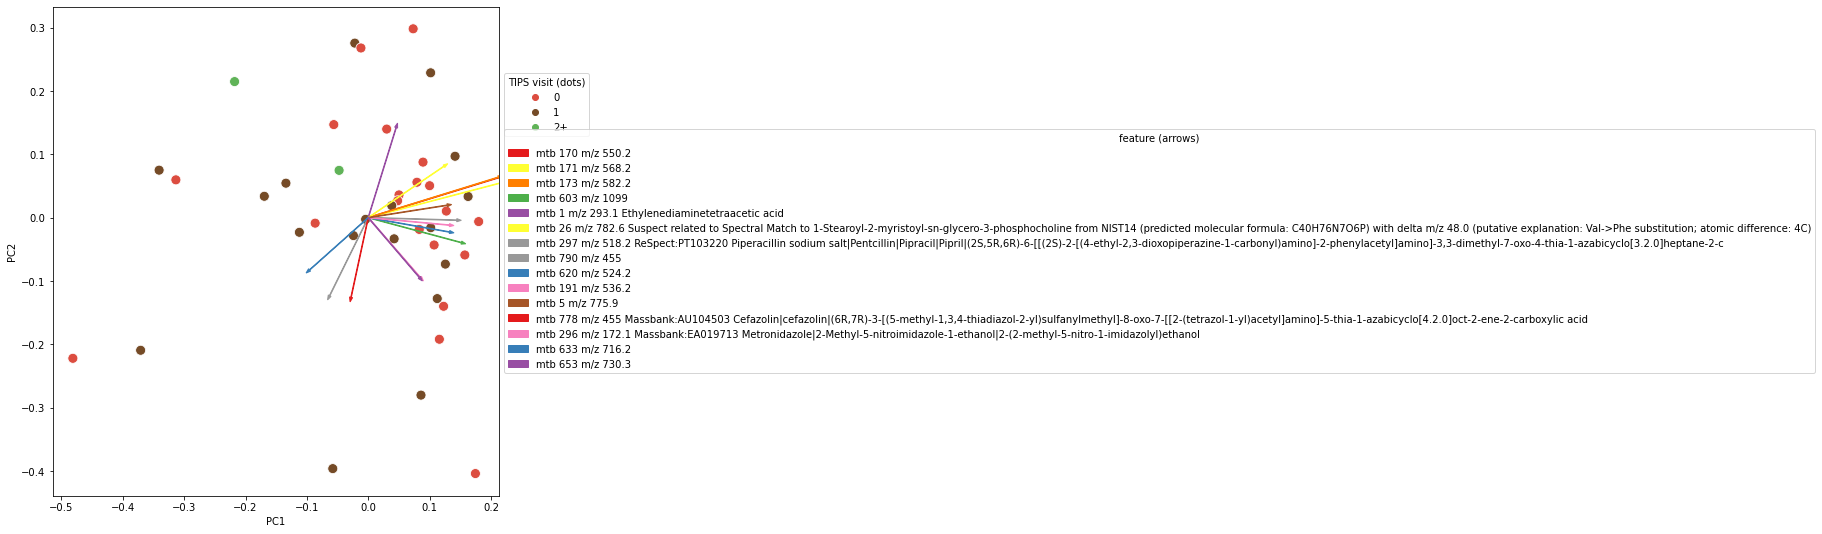

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(8, 9))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df,
            fpca_df, 'ATTRIBUTE_Worst_PreTIPS_HE_mod', ax)

#plt.show()
plt.savefig('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/SFR22_0304_biplot_preHEgrade_warrows.pdf',
            dpi=300,bbox_inches='tight')

## **Calculating the beta diversity acct for paired data**

To do this we used the qiime gemelli plugin

In [1]:
#dont run
! qiime gemelli rpca \
--i-table /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.qza \
--output-dir /mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/gemelli-rpca-peripheral

QIIME is caching your current deployment for improved performance. This may take a few moments and should only happen once per deployment.
Saved PCoAResults % Properties('biplot') to: /data/Stephany/liverpath/diversity_metrics_LCMS/rpca-results/biplot.qza
Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/rpca-results/distance_matrix.qza


In [1]:
! qiime gemelli ctf\
    --i-table /data/Stephany/liverpath//data_files/LCMS/quantification_table/quantification_table-post.qza  \
    --m-sample-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-post.txt \
    --p-state-column ATTRIBUTE_Worst_PostTIPS_HE \
    --p-individual-id-column ATTRIBUTE_pt_id \
    --output-dir /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE

QIIME is caching your current deployment for improved performance. This may take a few moments and should only happen once per deployment.
Saved PCoAResults % Properties('biplot') to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/subject_biplot.qza
Saved PCoAResults % Properties('biplot') to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/state_biplot.qza
Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/distance_matrix.qza
Saved SampleData[SampleTrajectory] to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/state_subject_ordination.qza
Saved FeatureData[FeatureTrajectory] to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/state_feature_ordination.qza


In [3]:
! qiime longitudinal volatility \
    --m-metadata-file /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/state_subject_ordination.qza \
    --p-state-column ATTRIBUTE_Worst_PostTIPS_HE \
    --p-default-group-column ATTRIBUTE_blood_origin \
    --p-default-metric PC1 \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/state_subject_ordination.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/state_subject_ordination.qzv


In [4]:
! qiime emperor biplot\
    --i-biplot /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/subject_biplot.qza \
    --m-sample-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-subject.txt \
    --p-number-of-features 595\
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/subject_biplot.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/subject_biplot.qzv


In [1]:
! qiime qurro loading-plot\
    --i-table /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-post.qza\
    --i-ranks /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/subject_biplot.qza\
    --m-sample-metadata-file /data/Stephany/liverpath/data_files/LCMS/metadata_table/metadata_table-post.txt \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/qurro.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/qurro.qzv


In [3]:
! qiime longitudinal volatility \
    --m-metadata-file /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/merged_sample_plot_data.txt\
    --p-state-column ATTRIBUTE_Worst_PostTIPS_HE \
    --p-individual-id-column ATTRIBUTE_pt_id \
    --p-default-group-column ATTRIBUTE_blood_origin \
    --p-default-metric Current_Natural_Log_Ratio \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/log_ratio_plot.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/log_ratio_plot.qzv


In [4]:
! qiime longitudinal linear-mixed-effects\
    --m-metadata-file /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/merged_sample_plot_data.txt\
    --p-state-column ATTRIBUTE_Worst_PostTIPS_HE \
    --p-individual-id-column ATTRIBUTE_pt_id \
    --p-group-columns ATTRIBUTE_blood_origin \
    --p-metric Current_Natural_Log_Ratio \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/lme_log_ratio.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results-HE/lme_log_ratio.qzv


In [7]:
! qiime longitudinal volatility \
    --m-metadata-file /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results/merged_sample_plot_data_procedure.txt\
    --p-state-column ATTRIBUTE_blood_procedure_num \
    --p-individual-id-column ATTRIBUTE_pt_id \
    --p-default-group-column ATTRIBUTE_blood_origin \
    --p-default-metric Current_Natural_Log_Ratio \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results/log_ratio_plot_procedure.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results/log_ratio_plot_procedure.qzv


In [1]:
! qiime longitudinal linear-mixed-effects\
    --m-metadata-file /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results/merged_sample_plot_data_procedure.txt\
    --p-state-column ATTRIBUTE_blood_procedure_num \
    --p-individual-id-column ATTRIBUTE_pt_id \
    --p-group-columns ATTRIBUTE_blood_origin \
    --p-metric Current_Natural_Log_Ratio \
    --o-visualization /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results/lme_log_ratio_procedure.qzv

Saved Visualization to: /data/Stephany/liverpath/diversity_metrics_LCMS/ctf-results/lme_log_ratio_procedure.qzv


## **Calculating the alpha diversity**

To do this we use the qiime plugin to calculate shannon diversity, observed OTUs, and Faith's PD. The latter we generated using the phylogenetic tree 'qemistree_serum.qza' generated through qemistree. Note: until qemistree gets fixed/updated, we can only look at non phylogenetic results.

In [3]:
#The alpha diveristy using 'shannon' 
! qiime diversity alpha \
--i-table /data/Stephany/liverpath/data_files/LCMS/qiime2_output/qiime2_table.qza \
--p-metric shannon \
--o-alpha-diversity /data/Stephany/liverpath/diversity_metrics/alpha_shannon_lcms.qza

Saved SampleData[AlphaDiversity] to: /data/Stephany/liverpath/diversity_metrics/alpha_shannon_lcms.qza


In [5]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics/alpha_shannon_lcms.qza \
--output-path /data/Stephany/liverpath/diversity_metrics/alpha_shannon_lcms

Exported /data/Stephany/liverpath/diversity_metrics/alpha_shannon_lcms.qza as AlphaDiversityDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics/alpha_shannon_lcms


In [6]:
#The alpha diveristy using 'observed_feature'  
! qiime diversity alpha \
--i-table /data/Stephany/liverpath/data_files/LCMS/qiime2_output/qiime2_table.qza \
--p-metric observed_features \
--o-alpha-diversity /data/Stephany/liverpath/diversity_metrics/alpha_obsOTU_lcms.qza

Saved SampleData[AlphaDiversity] to: /data/Stephany/liverpath/diversity_metrics/alpha_obsOTU_lcms.qza


In [7]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics/alpha_obsOTU_lcms.qza \
--output-path /data/Stephany/liverpath/diversity_metrics/alpha_obsOTU_lcms

Exported /data/Stephany/liverpath/diversity_metrics/alpha_obsOTU_lcms.qza as AlphaDiversityDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics/alpha_obsOTU_lcms


## **Calculating the beta diversity**
To do this we used the qiime plugin to calculate bray curtis, aitchison, weighted and unweighted unifrac. The latter two were generated using the phylogenetic tree qemistree_serum.qza generated through qemistree. Note: until qemistree gets fixed/updated, we can only look at non phylogenetic results.

In [8]:
#The beta diversity using 'bray curtis'  
! qiime diversity beta \
--i-table /data/Stephany/liverpath/data_files/LCMS/qiime2_output/qiime2_table.qza \
--p-metric braycurtis \
--o-distance-matrix /data/Stephany/liverpath/diversity_metrics/beta_braycurtis_lcms.qza

Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics/beta_braycurtis_lcms.qza


In [9]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics/beta_braycurtis_lcms.qza \
--output-path /data/Stephany/liverpath/diversity_metrics/beta_braycurtis_lcms

Exported /data/Stephany/liverpath/diversity_metrics/beta_braycurtis_lcms.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics/beta_braycurtis_lcms


In [3]:
#for just the peripheral
! qiime diversity beta \
--i-table /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral.qza \
--p-metric braycurtis \
--o-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral.qza

! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral

Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral.qza
Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral


In [9]:
#for just pre and post peripheral
! qiime diversity beta \
--i-table /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-peripheral-prepost.qza \
--p-metric braycurtis \
--o-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral_prepost.qza

! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral_prepost.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral_prepost

Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral_prepost.qza
Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral_prepost.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_peripheral_prepost


In [8]:
#for just the hepatic
! qiime diversity beta \
--i-table /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-hepatic.qza \
--p-metric braycurtis \
--o-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_hepatic.qza

! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_hepatic.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_hepatic

Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_hepatic.qza
Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_hepatic.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_hepatic


In [10]:
#just postTIPS
! qiime diversity beta \
--i-table /data/Stephany/liverpath/data_files/LCMS/quantification_table/quantification_table-post.qza \
--p-metric braycurtis \
--o-distance-matrix /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_post.qza

! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_post.qza \
--output-path /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_post

Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_post.qza
Exported /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_post.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics_LCMS/beta_braycurtis_lcms_post


In [10]:
#The beta diversity using 'aitchison'  
! qiime diversity beta \
--i-table /data/Stephany/liverpath/data_files/LCMS/qiime2_output/qiime2_table.qza \
--p-metric aitchison \
--o-distance-matrix /data/Stephany/liverpath/diversity_metrics/beta_aitchison_lcms.qza

Saved DistanceMatrix to: /data/Stephany/liverpath/diversity_metrics/beta_aitchison_lcms.qza


In [11]:
! qiime tools export \
--input-path /data/Stephany/liverpath/diversity_metrics/beta_aitchison_lcms.qza \
--output-path /data/Stephany/liverpath/diversity_metrics/beta_aitchison_lcms

Exported /data/Stephany/liverpath/diversity_metrics/beta_aitchison_lcms.qza as DistanceMatrixDirectoryFormat to directory /data/Stephany/liverpath/diversity_metrics/beta_aitchison_lcms
